In [1]:
import supervision as sv
import numpy as np
import cv2
from ultralytics import YOLO

model = YOLO("weights/yolov8m.pt")

def callback(x: np.ndarray) -> sv.Detections:
    result = model(x, verbose=False, conf=0.25)[0]
    return sv.Detections.from_ultralytics(result)

In [2]:
image = cv2.imread("gyeonggi_0106_day_clear_0027_0000.jpg")

slicer = sv.InferenceSlicer(callback=callback)
sliced_detections = slicer(image=image)

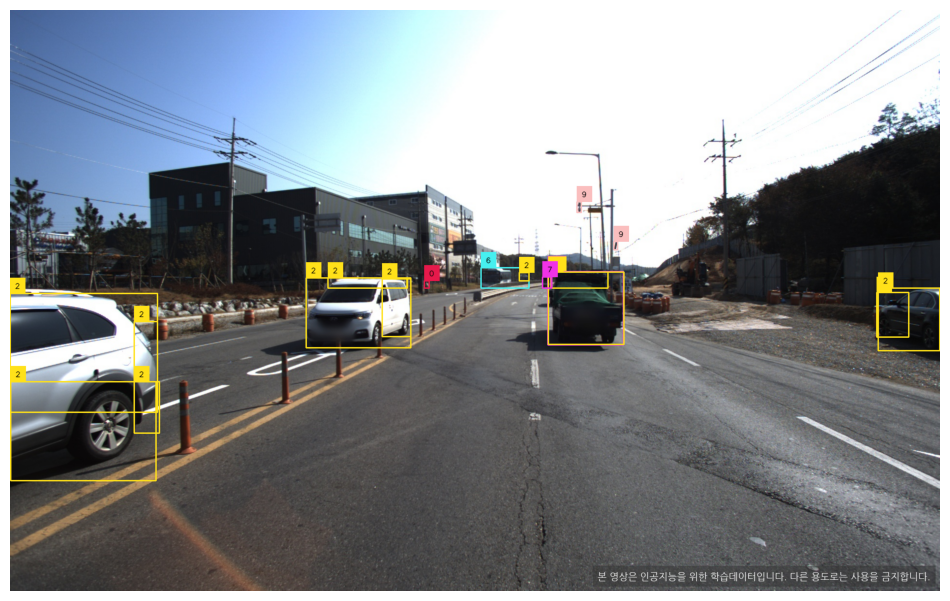

In [3]:
box_annotator = sv.BoxAnnotator()

sliced_image = box_annotator.annotate(image.copy(), detections=sliced_detections)

sv.plot_image(sliced_image)

In [10]:
sliced_detections

Detections(xyxy=array([[     656.74,      554.38,      820.28,      575.82],
       [     768.33,      556.25,      819.44,      575.81],
       [        856,      560.52,      865.11,      575.87],
       [     1116.9,      541.87,      1234.2,      575.83],
       [       1170,       397.5,        1180,      419.41],
       [     1246.3,      479.64,      1254.1,      496.94],
       [     1117.7,      542.16,      1234.9,      575.85],
       [    0.25882,      586.14,      304.99,      831.54],
       [     256.25,      644.79,      304.43,      831.59],
       [     611.44,      554.82,      827.86,      698.34],
       [     768.26,      556.41,      827.71,      675.71],
       [     972.53,      533.84,      1071.4,      575.22],
       [     1110.6,      541.87,        1267,      692.35],
       [     1111.1,      542.05,      1267.4,      691.89],
       [     1099.3,      552.93,      1118.3,      575.85],
       [     1051.8,      543.77,      1071.2,      560.44],
       [

Custom model + sahi prediction

In [15]:
from sahi.utils.yolov5 import (
    download_yolov5s6_model,
)

from sahi import AutoDetectionModel
from sahi.utils.cv import read_image
from sahi.predict import get_prediction, get_sliced_prediction, predict
from IPython.display import Image

In [16]:
yolov5_model_path = 'weights/detect_model.pt'
download_yolov5s6_model(destination_path=yolov5_model_path)

In [17]:
detection_model = AutoDetectionModel.from_pretrained(
    model_type='yolov5',
    model_path=yolov5_model_path,
    confidence_threshold=0.3,
    device="cuda:0", # or 'cuda:0'
    image_size=2048
)

YOLOv5  2023-9-1 Python-3.8.17 torch-1.12.1+cu113 CUDA:0 (NVIDIA GeForce RTX 3080, 12288MiB)

Fusing layers... 
Model summary: 477 layers, 77054776 parameters, 0 gradients, 112.5 GFLOPs
Adding AutoShape... 


yolov5 detect.py

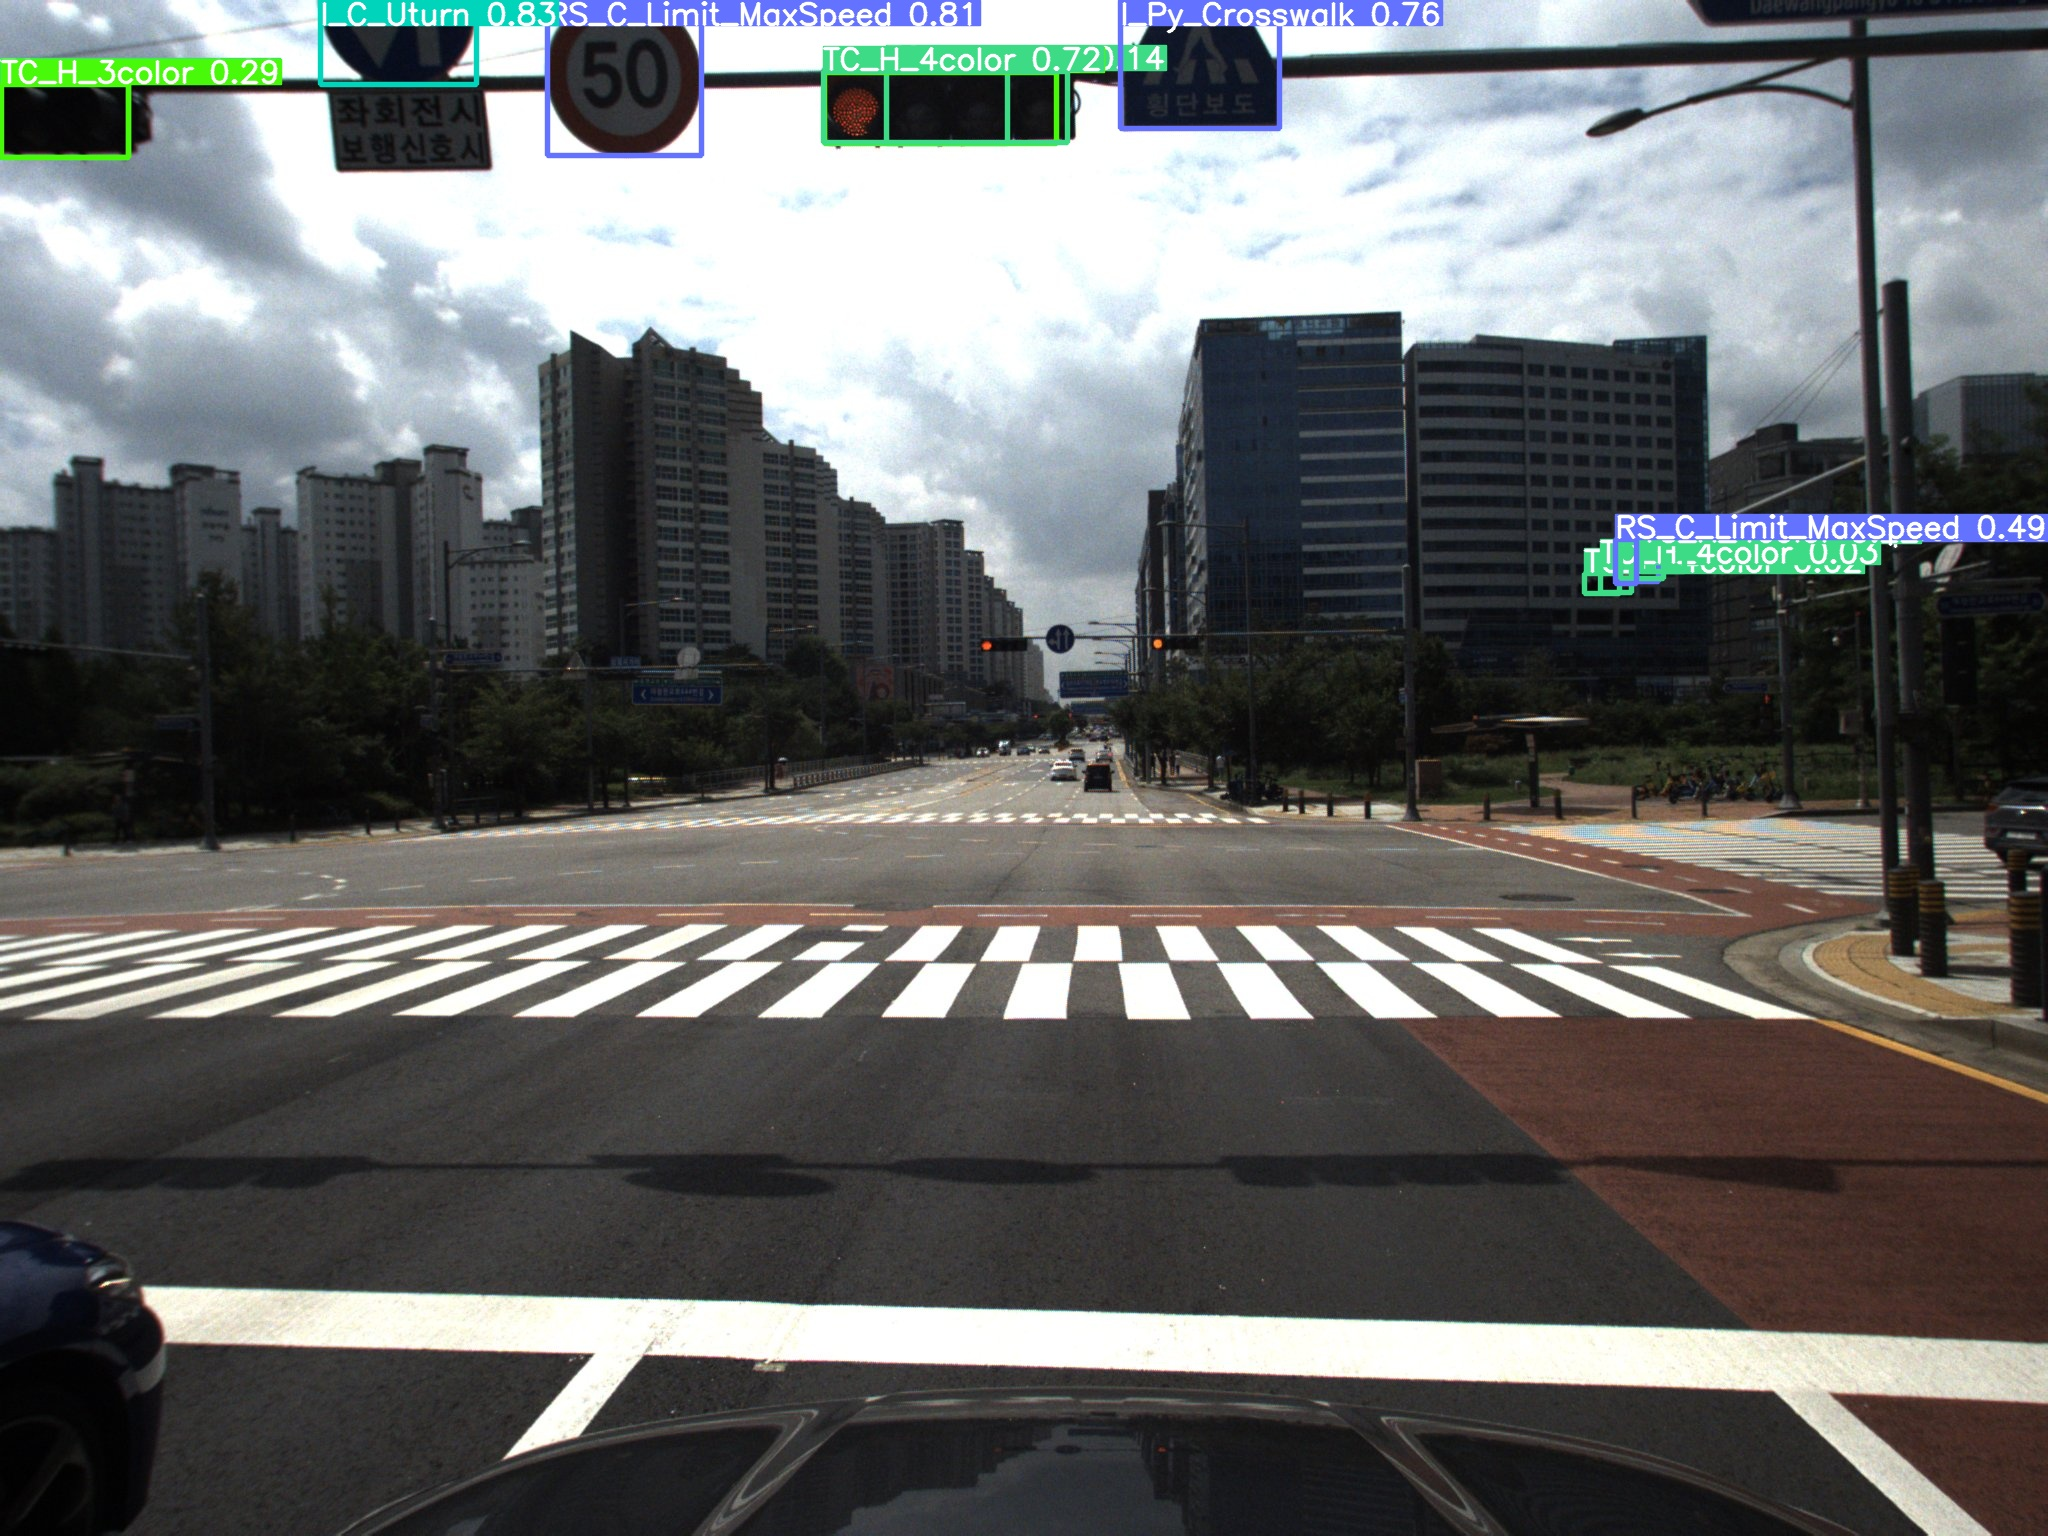

In [20]:
Image("C:/Users/combus-rnd/yolov5/L모델변경/L모델TEST DATA DETECT/202307271116_im[000082].jpg")

In [21]:
result = get_prediction(read_image("C:/Users/combus-rnd/yolov5/datasets/cam_file/202307271116_im[000082].jpg"), detection_model)

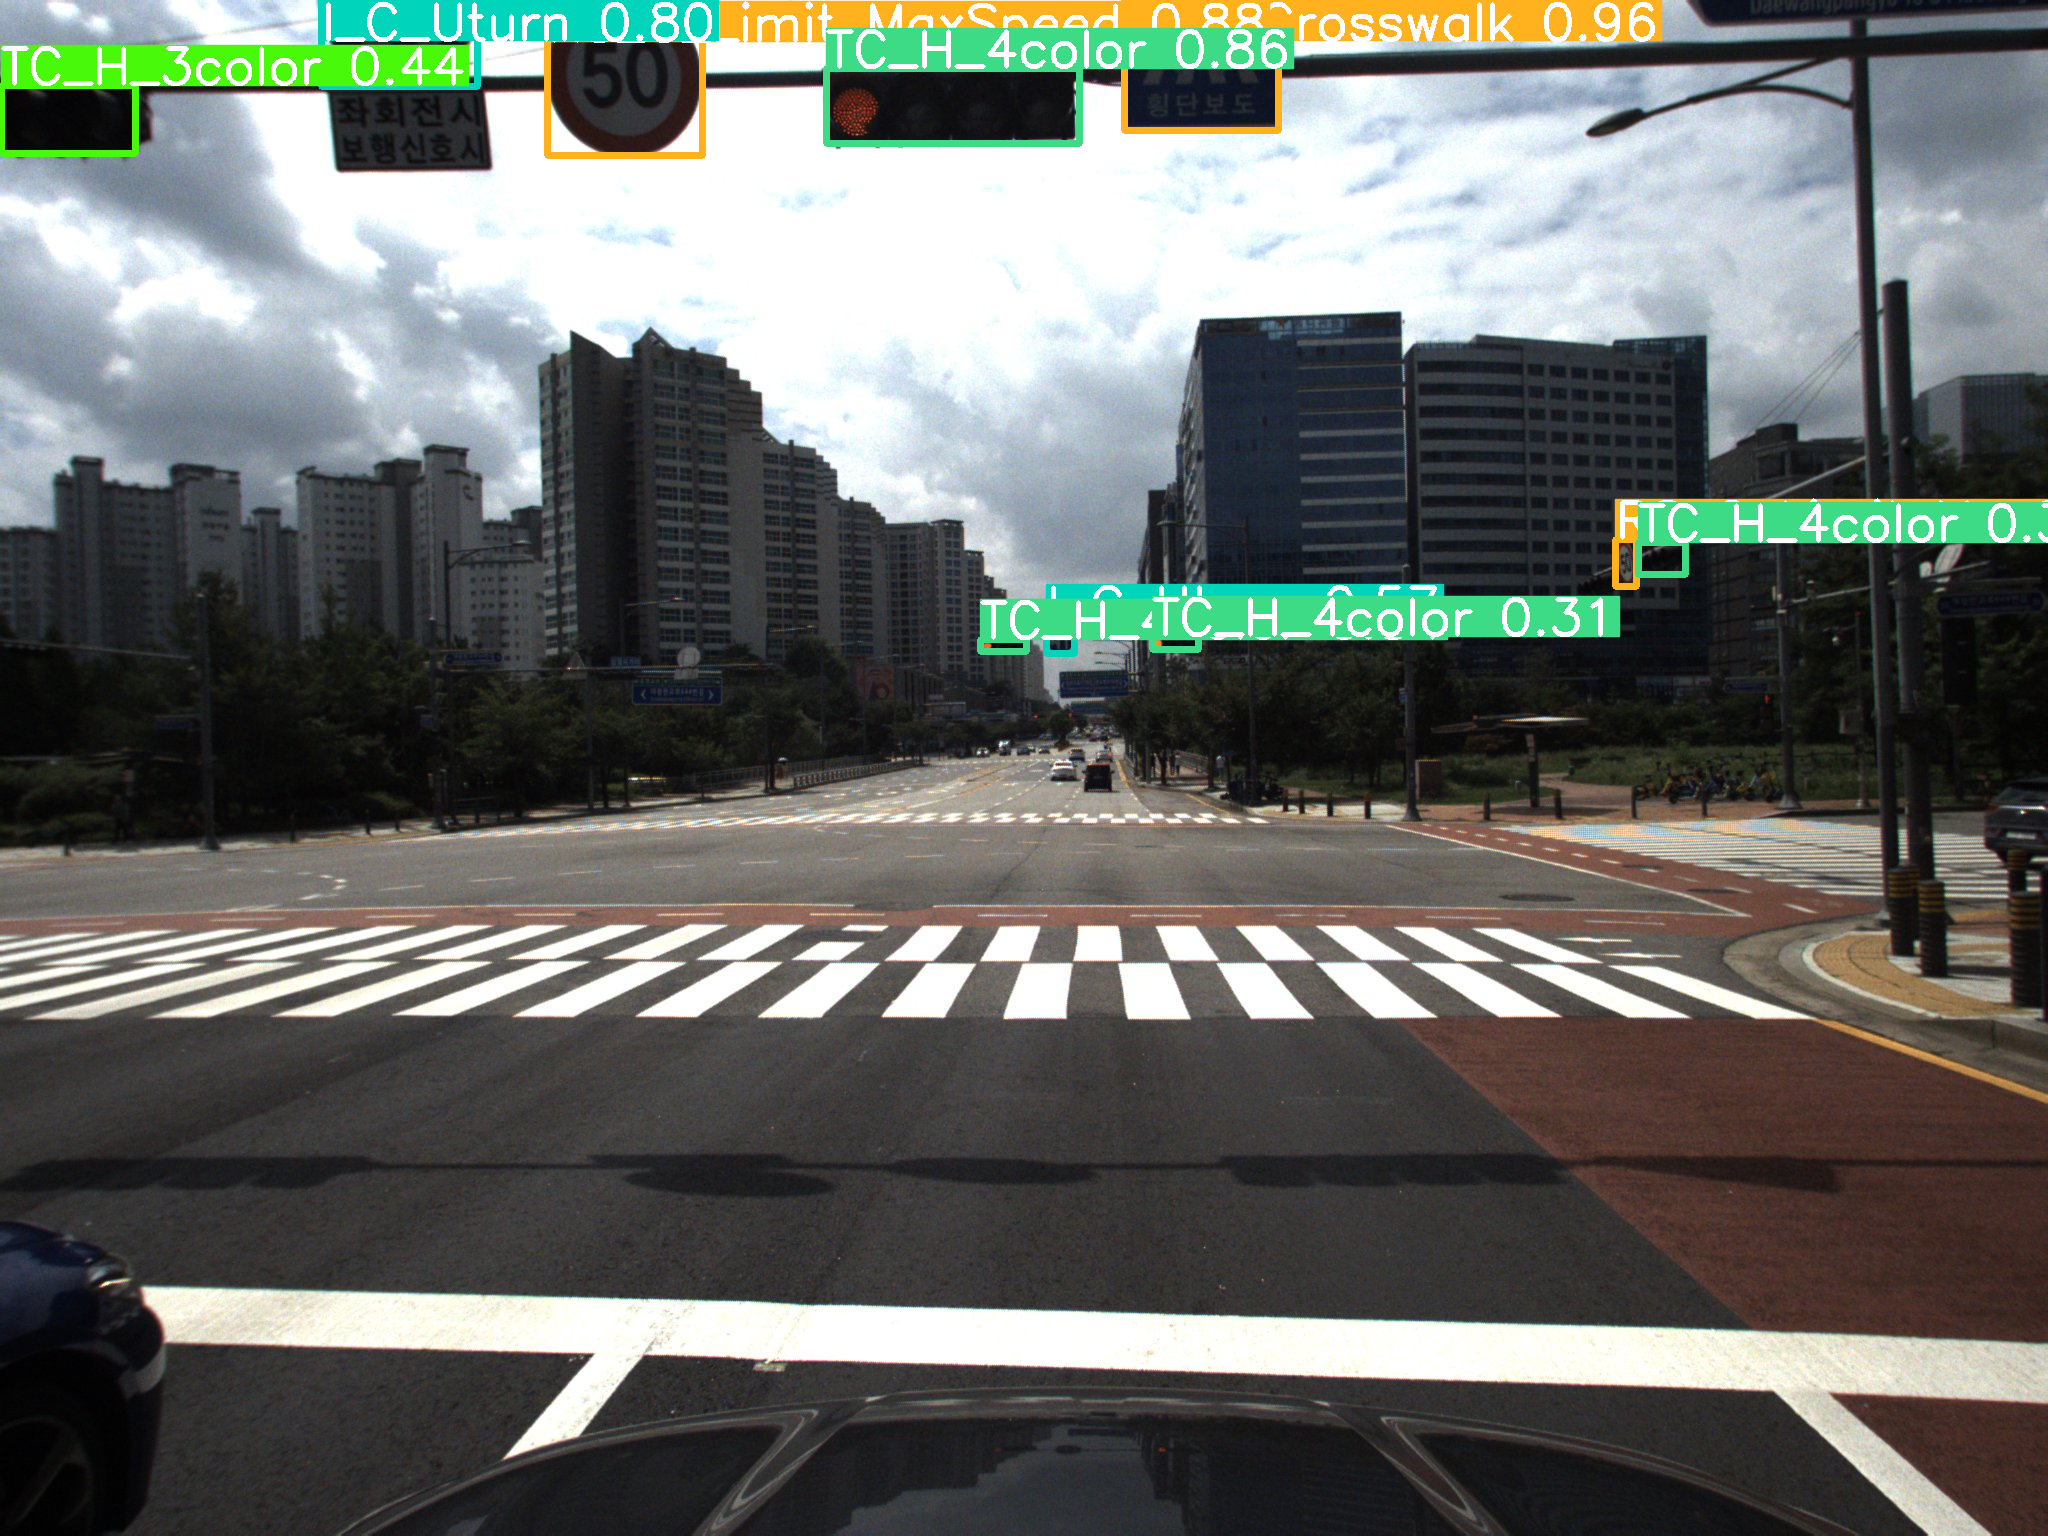

In [22]:
result.export_visuals(export_dir="demo_data/")

Image("demo_data/prediction_visual.png")

In [80]:
result.object_prediction_list

[ObjectPrediction<
     bbox: BoundingBox: <(1124.986, 0, 1278.0663, 130.42192), w: 153.080322265625, h: 130.4219207763672>,
     mask: None,
     score: PredictionScore: <value: 0.9582852721214294>,
     category: Category: <id: 53, name: I_Py_Crosswalk>>,
 ObjectPrediction<
     bbox: BoundingBox: <(547.40857, 1.6152039, 702.00305, 155.9929), w: 154.594482421875, h: 154.37770080566406>,
     mask: None,
     score: PredictionScore: <value: 0.8809358477592468>,
     category: Category: <id: 113, name: RS_C_Limit_MaxSpeed>>,
 ObjectPrediction<
     bbox: BoundingBox: <(826.19116, 68.08768, 1079.345, 143.63258), w: 253.15380859375, h: 75.54490661621094>,
     mask: None,
     score: PredictionScore: <value: 0.8639665246009827>,
     category: Category: <id: 87, name: TC_H_4color>>,
 ObjectPrediction<
     bbox: BoundingBox: <(321.2235, 0, 477.05267, 86.55224), w: 155.82916259765625, h: 86.55223846435547>,
     mask: None,
     score: PredictionScore: <value: 0.7966534495353699>,
     ca